In [67]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('KNN_Project_Data')

In [69]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [71]:
from sklearn.preprocessing import StandardScaler

In [74]:
scale = StandardScaler()

In [75]:
scale.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
feature = scale.transform(df.drop('TARGET CLASS', axis=1))

In [77]:
from sklearn.model_selection import train_test_split

In [113]:
X = feature
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=1)

In [120]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [121]:
pred = knn.predict(X_test)

In [122]:
from sklearn.metrics import confusion_matrix, classification_report

In [123]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[104  38]
 [ 47 111]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       142
           1       0.74      0.70      0.72       158

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [124]:
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error rate')

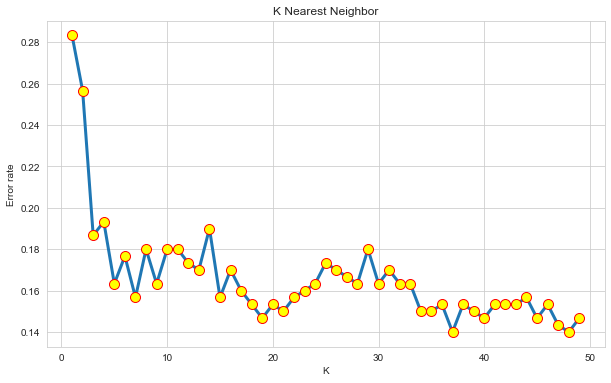

In [130]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
p =plt.plot(range(1,50),error,ls='-', lw=3,marker='o', mec='red', mfc='yellow',ms=10,mew=1)
plt.title('K Nearest Neighbor')
plt.xlabel('K')
plt.ylabel('Error rate')

In [128]:
knn = KNeighborsClassifier(n_neighbors=37) #The graph above tells me that the lowest error rate is at K = 37. 
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [129]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[115  27]
 [ 15 143]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       142
           1       0.84      0.91      0.87       158

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

